In [70]:
# Find curvature of top surface
using CSV, DataFrames, Statistics, Glob
using Dierckx, Interpolations
using Plots
using LaTeXStrings

┌ Info: Precompiling Interpolations [a98d9a8b-a2ab-59e6-89dd-64a1c18fca59]
└ @ Base loading.jl:1278


In [173]:
workdir = "/media/srinath/data/srinath/Projects/moose_tests/supercomp_latest/curved_surface/glued/dw_2.0_dh_4.0/csv"
# basedir = "/home/srinath/data/Projects/moose_tests/supercomp_latest/curvature/"
# workdir = basedir * "no_crack/csv"
spline_size = 25

cd(workdir)
filebase = "full_model_quartz_top"
filebase2 = "full_model_ceramic_bot"

files_top = glob(filebase * "_*csv", workdir);
files_bot = glob(filebase2 * "_*csv", workdir);
post_proc_file = "full_model.csv"
dfs_top = DataFrame.(CSV.File.(files_top));
dfs_bot = DataFrame.(CSV.File.(files_bot));

In [248]:
df_post = DataFrame(CSV.File(post_proc_file))
df_fin = DataFrame([Float64, Float64],[:time, :curvature])
spline_size = [25.0, 250.0, 500.0]

p = plot(xlabel = "x" ,
        ylabel = "Curvature (1/m)",
        xmirror = false,
        framestyle = :box,
        legend = :outertopright,
        legendfontsize = 14,
        legendtitlefontsize = 16,
        tickfontsize = 14,
        guidefontsize = 16,
        foreground_color_legend=nothing,
        background_color_legend=nothing,
        titlefontsize = 16,
        grid = false, 
        layout= (length(spline_size),1));

p2 = plot(xlabel = "x" ,
        ylabel = "Displacement",
        xmirror = false,
        framestyle = :box,
        legend = :outertopright,
        legendfontsize = 14,
        legendtitlefontsize = 16,
        tickfontsize = 14,
        guidefontsize = 16,
        foreground_color_legend=nothing,
        background_color_legend=nothing,
        titlefontsize = 16,
        grid = false, 
        layout= (length(spline_size),1), 
        xlim = (0, 25));
p3 = plot(xlabel = "Time (hrs)" ,
        ylabel = "Curvature (1/m)",
        xmirror = false,
        framestyle = :box,
        legend = :outertopright,
        legendfontsize = 14,
        legendtitlefontsize = 16,
        tickfontsize = 14,
        guidefontsize = 16,
        foreground_color_legend=nothing,
        background_color_legend=nothing,
        titlefontsize = 16,
        grid = false,
        layout= (length(spline_size),1));
for (j,s) in enumerate(spline_size)
    println("$j, $s")
    df_fin = DataFrame([Float64, Float64],[:time, :curvature])
    for i in 2:length(dfs_top)
#         insert!.(eachcol(dfs_top[i]),1,[0,25,0,16876,0.0,0.0])
        dfs_top[i][!,:time] .= df_post[i,:time]
        x = dfs_top[i][!,"x"].*1e-6 # Convert to m
        y = dfs_top[i][!,"uy"].*1e-6 # Convert to m
        x_top = x
        y_top = y
        xmin = minimum(x)*1e6
        time1 = df_post[i,1] # convert to hours
        
        # Fit a spline to the actual data 
        spl_top = Spline1D(x,y, k = 5)
        
        # now fit a interpolated cubic spline with linear extrapolation at the ends
        xx = minimum(x):0.001e-6:maximum(x)
        yy = evaluate(spl_top, xx)
        spl_top2 = CubicSplineInterpolation(xx, yy, extrapolation_bc=Line())

        # Extend the data set to include extra x points for new spline fitting
        xx2 = collect(xmin:0.001:s)
        xx2 .= xx2 .* 1e-6
        yy2 = spl_top2(xx2)

        spl = Spline1D(xx2, yy2, k = 5)
        yp = derivative(spl, xx2)
        ypp = derivative(spl, xx2; nu = 2)
        curvature = ypp ./ (1.0 .+ yp .^2) .^(1.5)
        mc = mean(curvature)
        c1 = curvature[1]
        d1 = yp[1]
        dd1 = ypp[1]
        labstr = string(round(time1,digits=2))
        if (i == length(dfs_top))
            println(curvature[1])
            plot!(p, xx2.*1e6, curvature, label=labstr, subplot=j)
            plot!(p2, xx2.*1e6, yy2*1e6, label = labstr, subplot=j)
            scatter!(p2, x_top.*1e6, y_top*1e6,legend = false, subplot=j)
            println("$time1, $mc, $c1, $d1, $dd1")
        end
        push!(df_fin, [time1, mean(curvature)])
    end
    labstr2 = string(s)
    plot!(p3, df_fin[!,1]/3600, -df_fin[!,2], label=labstr2, subplot=j)
end

1, 25.0
0.029901430246252157
963.71927261353, -0.8350235657270496, 0.029901430246252157, -2.9952237684740873e-6, 0.02990143024665454
2, 250.0
0.029901430246252157
963.71927261353, -0.08084765752070386, 0.029901430246252157, -2.9952237684740873e-6, 0.02990143024665454
3, 500.0
0.029901430246252157
963.71927261353, -0.040352556835129866, 0.029901430246252157, -2.9952237684740873e-6, 0.02990143024665454


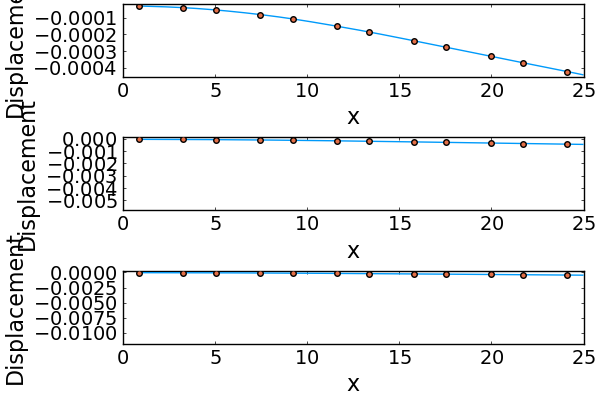

In [249]:
plot(p2)

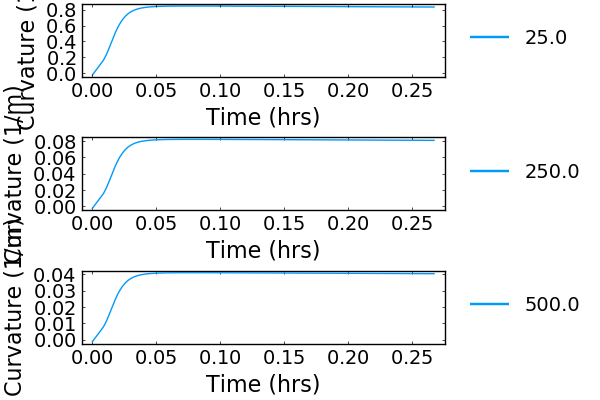

In [250]:
plot(p3)

In [252]:
png(p3, "curvature_test.png")

In [193]:
plot(p2,"test.png")

LoadError: MethodError: no method matching Plots.Plot{Plots.PyPlotBackend}(::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char, ::Char)
Closest candidates are:
  Plots.Plot{Plots.PyPlotBackend}(::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any) where T<:AbstractBackend at /home/srinath/.julia/packages/Plots/KN96c/src/types.jl:68

In [92]:
spline_size = [25.0, 250.0, 2500.0]
for s in spline_size
    println(s)
end

25.0
250.0
2500.0


In [72]:
xs

1.0:0.2:5.0

In [100]:
spline_size

3-element Array{Float64,1}:
   25.0
  250.0
 2500.0

In [203]:
x = 10; 
println("The value of x is $x and y is $x")

The value of x is 10 and y is 10


In [75]:
itp(2.5)

0.9162915297988475

In [76]:
log(2.5)

0.9162907318741551

In [77]:
itp(6.0)

1.8117454000947686

In [78]:
xx = 1:0.1:10.0

1.0:0.1:10.0

In [79]:
yy = itp(xx)

91-element Array{Float64,1}:
 0.0
 0.0935301291092129
 0.18232155679395456
 0.2628529234333883
 0.33647223662121284
 0.4053407868815575
 0.47000362924573563
 0.5306655711198678
 0.5877866649021191
 0.6418464514616979
 0.6931471805599453
 0.7419410524380254
 0.7884573603642705
 ⋮
 2.398437114310707
 2.4186678630767737
 2.438898611842841
 2.4591293606089075
 2.4793601093749746
 2.4995908581410413
 2.519821606907108
 2.5400523556731747
 2.560283104439242
 2.580513853205309
 2.6007446019713756
 2.6209753507374423

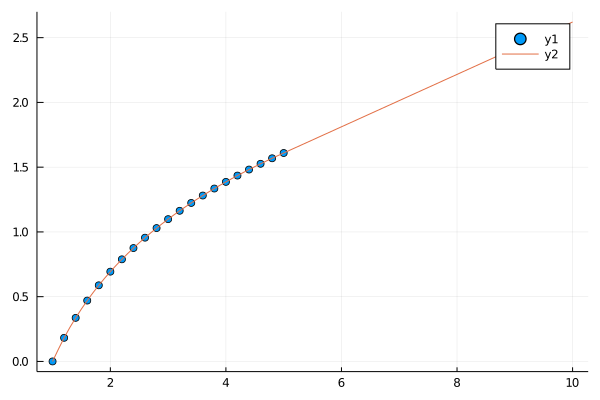

In [82]:
scatter(xs,A)
plot!(xx,yy)